
Mean Squared Error: 52135331406.55554


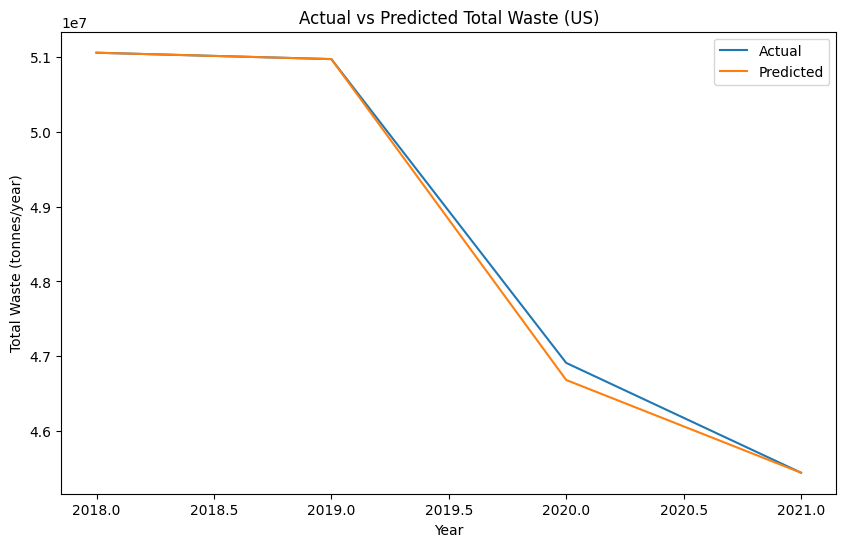


Updated Dataset:
  Country  Year  Household_estimate  Food_service_estimate  Retail_estimate  \
0      US  2021        1.935995e+07           2.093483e+07     5.151313e+06   
1      US  2020        2.024051e+07           2.135540e+07     5.316687e+06   
2      US  2019        2.154126e+07           2.369484e+07     5.733197e+06   
3      US  2018        2.186821e+07           2.358892e+07     5.597276e+06   
4      US  2017        2.171936e+07           2.279919e+07     5.535384e+06   
5      US  2016        1.966577e+07           2.321748e+07     5.208377e+06   
6      US  2022        2.122160e+07           2.341491e+07     5.424295e+06   
7      US  2023        2.051514e+07           2.181367e+07     5.206232e+06   

    total_waste  
0  4.544609e+07  
1  4.691260e+07  
2  5.096930e+07  
3  5.105441e+07  
4  5.005394e+07  
5  4.809162e+07  
6  5.006081e+07  
7  4.753504e+07  

Prediction for the next year (2024): 49172395.42358656 tonnes

Prediction for the next year (2024) with was

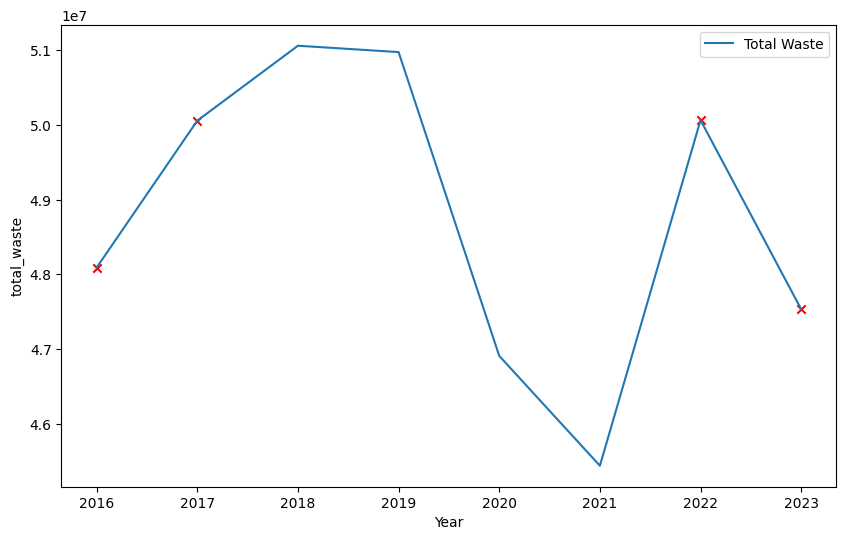

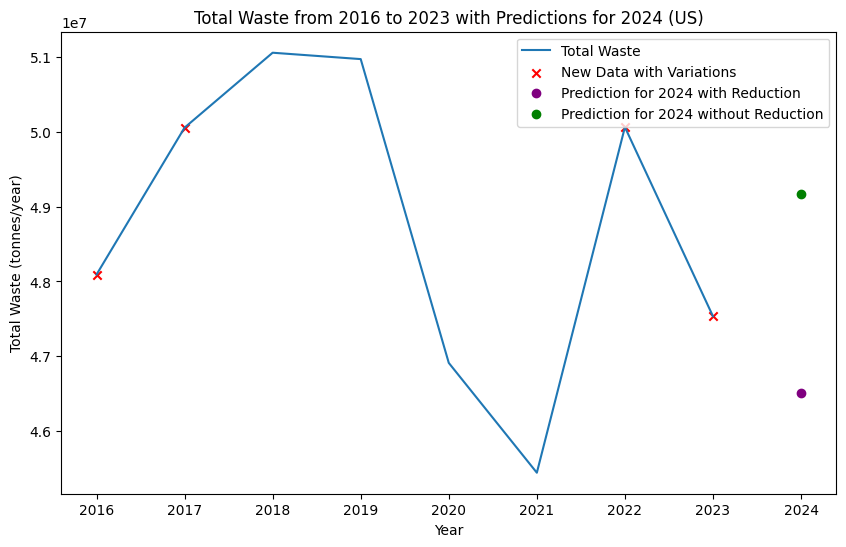

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Function to generate variations
def generate_variation(value):
    variation_percentage = random.uniform(-0.075, 0.075)
    variation = value * variation_percentage
    return value + variation

# Your dataset
data = {
    'Country': ['US', 'US', 'US', 'US'],
    'Year': [2021, 2020, 2019, 2018],
    'Household_estimate': [19359951,20240511,21541263,21868213],
    'Food_service_estimate': [20934827,21355399,23694842,23588921],
    'Retail_estimate': [5151313,5316687,5733197,5597276]
}

df_original = pd.DataFrame(data)

# Convert the 'Year' column to numeric format
df_original['Year'] = pd.to_numeric(df_original['Year'])

# Calculate 'total_waste'
df_original['total_waste'] = df_original['Household_estimate'] + df_original['Food_service_estimate'] + df_original['Retail_estimate']

# Split the data into features and target variable
X = df_original[['Year', 'Household_estimate', 'Food_service_estimate']]
y = df_original['total_waste']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Model accuracy evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')

# Visualization of actual and predicted values
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='total_waste', data=df_original, label='Actual')
sns.lineplot(x='Year', y=model.predict(X), data=df_original, label='Predicted')
plt.title('Actual vs Predicted Total Waste (US)')
plt.xlabel('Year')
plt.ylabel('Total Waste (tonnes/year)')
plt.legend()
plt.show()

# Adding data for 2016, 2017, 2022, and 2023 with variations
new_data = {
    'Country': ['US', 'US', 'US', 'US'],
    'Year': [2017, 2016, 2022, 2023],
    'Household_estimate': [generate_variation(df_original['Household_estimate'].mean()) for _ in range(4)],
    'Food_service_estimate': [generate_variation(df_original['Food_service_estimate'].mean()) for _ in range(4)],
    'Retail_estimate': [generate_variation(df_original['Retail_estimate'].mean()) for _ in range(4)]
}

# Adding new data to the existing dataset
df_updated = pd.concat([df_original, pd.DataFrame(new_data)], ignore_index=True)

# Calculate 'total_waste' for the updated dataset
df_updated['total_waste'] = df_updated['Household_estimate'] + df_updated['Food_service_estimate'] + df_updated['Retail_estimate']

# Display the updated dataset with 'total_waste'
print("\nUpdated Dataset:")
print(df_updated)

# Visualization of the updated dataset with 'total_waste'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='total_waste', data=df_updated, label='Total Waste')
plt.scatter(new_data['Year'], df_updated.loc[df_updated['Year'].isin(new_data['Year']), 'total_waste'], color='red', label='New Data with Variations', marker='x')

# Prediction for the next year (2024)
future_data_2024 = {'Country': ['US'], 'Year': [2024], 'Household_estimate': [generate_variation(df_updated['Household_estimate'].mean())], 'Food_service_estimate': [generate_variation(df_updated['Food_service_estimate'].mean())]}
future_df_2024 = pd.DataFrame(future_data_2024)

# Adding the 'reduction_percentage' for 2024
reduction_percentage_2024 = random.uniform(0.018, 0.024)  # assuming it's a random value within the specified range
df_updated.loc[df_updated['Year'] == 2024, 'reduction_percentage'] = reduction_percentage_2024

# Adding the 'total_waste' column to future_df_2024
future_df_2024['total_waste'] = future_df_2024['Household_estimate'] + future_df_2024['Food_service_estimate'] + df_updated[df_updated['Year'] == 2023]['Retail_estimate'].values[0]

# Prediction
future_prediction_2024 = model.predict(future_df_2024[['Year', 'Household_estimate', 'Food_service_estimate']])
print(f'\nPrediction for the next year (2024): {future_prediction_2024[0]} tonnes')

# Prediction for 2024 with waste reduction
future_prediction_2024_with_reduction = df_updated[df_updated['Year'] == 2023]['total_waste'].values[0] * (1 - reduction_percentage_2024)
print(f'\nPrediction for the next year (2024) with waste reduction: {future_prediction_2024_with_reduction} tonnes')

# Adding points for 2024
# Visualizing the updated dataset with 'total_waste'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='total_waste', data=df_updated, label='Total Waste')
plt.scatter(new_data['Year'], df_updated.loc[df_updated['Year'].isin(new_data['Year']), 'total_waste'], color='red', label='New Data with Variations', marker='x')

# Adding points for 2024
plt.scatter(2024, future_prediction_2024_with_reduction, color='purple', label='Prediction for 2024 with Reduction', marker='o')

plt.scatter(2024, future_prediction_2024, color='green', label='Prediction for 2024 without Reduction', marker='o')

plt.title('Total Waste from 2016 to 2023 with Predictions for 2024 (US)')
plt.xlabel('Year')
plt.ylabel('Total Waste (tonnes/year)')
plt.legend()

plt.show()

